In [4]:
#2
def get_initial(name):
    
#한글 to 영어 알파벳 대응
    initial_list = ['ㄱ', 'ㄲ', 'ㄴ', 'ㄷ', 'ㄸ', 'ㄹ', 'ㅁ', 'ㅂ', 'ㅃ', 'ㅅ', 'ㅆ', 'ㅇ', 'ㅈ', 'ㅉ', 'ㅊ', 'ㅋ', 'ㅌ', 'ㅍ', 'ㅎ']
    initial_eng_list = ['K', 'K', 'N', 'D', 'DD', 'R', 'M', 'B', 'BB', 'S', 'S', 'A', 'J', 'J', 'CH', 'K', 'T', 'P', 'H']
    
    first_char = name[0]
    
#유니코드 이용    
    initial_index = (ord(first_char) - ord('가')) // 588
    
    initial_eng = initial_eng_list[initial_index]
    
    return initial_eng


name = input("한글 이름을 입력하세요: ")

try:
    initial = get_initial(name)
    print(" ", initial)
except ValueError as e:
    print(e)

한글 이름을 입력하세요: 허앙
  H


In [7]:
#3번문제

import random

#100만개 임의의 숫자 만들기
random_numbers = [random.randint(0, 9) for _ in range(1000000)]

# 학번의 마지막 6자리 "130446" 
target_number = [int(d) for d in "130446"]


count = 0
matching_sequences = 0

#반복문으로 찾기
for num in random_numbers:
    if num == target_number[count]:
        count += 1
    else:
        count = 0
    if count == len(target_number):
        matching_sequences += 1
        count = 0

print("일치 횟수 : ", matching_sequences)


#이론적 확률 1/1000,000. 즉 1번 시행 평균 1개
#실제 10번 동안의 시행 개수 2,0,0,0,1,3,0,2,1,1
#실제와 이론이 유사함을 알 수 있음


일치 횟수 :  0


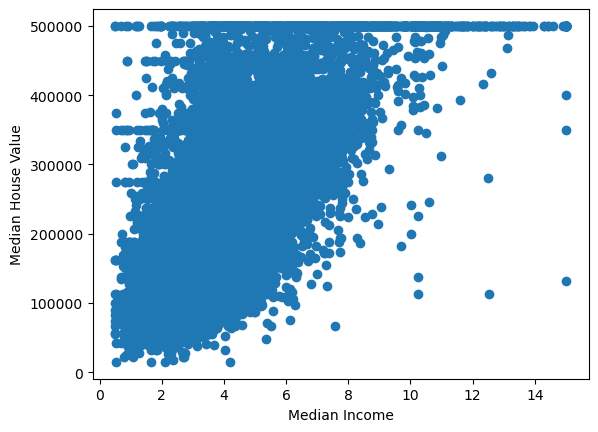

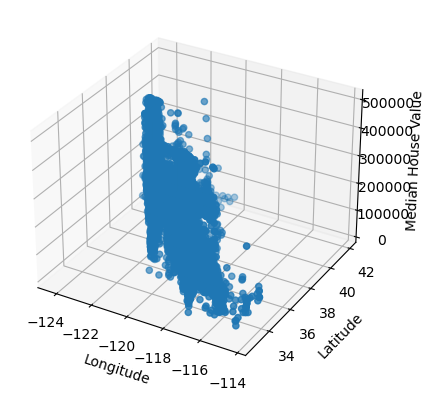

In [6]:
#4
import pandas as pd
import matplotlib.pyplot as plt


data=pd.read_csv("https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv")
data.head()

# 산점도
plt.scatter(data['median_income'], data['median_house_value'])
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show()

# 3차원 그래프
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['longitude'], data['latitude'], data['median_house_value'])
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Median House Value')
plt.show()




In [34]:
# 4-a

#첫번쨰 데이터셋과 두번째 데이터 셋 모두에서 상관이 0.68정도가 나옴. 
# 그러므로 높은 상관을 가지고 있다고 말할 수 있음.

import pandas as pd
import numpy as np
from scipy.stats import pearsonr

data = pd.read_csv("https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv")

# 데이터셋 나누기
np.random.seed(42)  
data_half_1 = data.sample(frac=0.5)
data_half_2 = data.drop(data_half_1.index)

# Pearson 상관 계수 계산
corr_coef, _ = pearsonr(data_half_1['median_house_value'], data_half_1['median_income'])
print("첫 번째 데이터셋의 Pearson 상관 계수:", corr_coef)

corr_coef, _ = pearsonr(data_half_2['median_house_value'], data_half_2['median_income'])
print("두 번째 데이터셋의 Pearson 상관 계수:", corr_coef)



첫 번째 데이터셋의 Pearson 상관 계수: 0.6873422610481021
두 번째 데이터셋의 Pearson 상관 계수: 0.6888118911962386


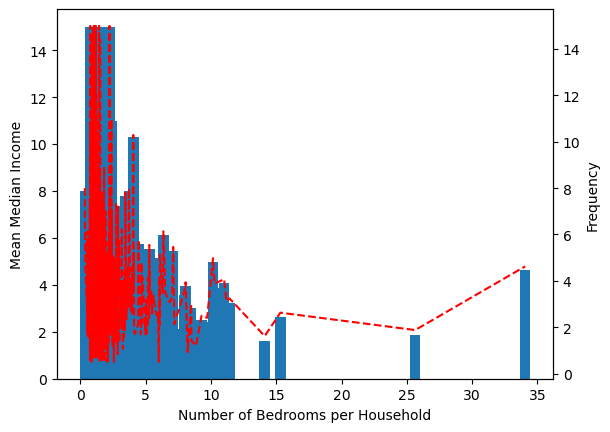

In [23]:
#4-b

import pandas as pd
import matplotlib.pyplot as plt

data=pd.read_csv("https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv")

# 가구당 침실 수 계산 및 컬럼 추가
data['가구당_침실수'] = data['total_bedrooms'] / data['households']

# 데이터를 가구당 침실 수로 그룹화하여 평균과 빈도 계산
grouped_data = data.groupby('가구당_침실수').agg({'median_income': 'mean', '가구당_침실수': 'count'})


grouped_data.drop(columns=['가구당_침실수'], inplace=True)

# 인덱스
grouped_data.reset_index(inplace=True)

# 평균과 빈도를 그래프로 표시
fig, ax1 = plt.subplots()
ax1.bar(grouped_data['가구당_침실수'], grouped_data['median_income'])
ax1.set_xlabel('Number of Bedrooms per Household')
ax1.set_ylabel('Mean Median Income')

ax2 = ax1.twinx()
ax2.plot(grouped_data['가구당_침실수'], grouped_data['median_income'], 'r--')
ax2.set_ylabel('Frequency')
plt.show()




In [26]:
#5

import numpy as np

birth_date = '19960529' 
student_number = '20171304' 


birth_date_digits = [int(d) for d in str(birth_date)]

student_number_digits = [int(d) for d in str(student_number[:8])]

# 2by8 행렬 만들기
c = np.vstack((birth_date_digits, student_number_digits))

# 연산
c_plus_7 = c + 7
c_minus_7 = c - 7
c_times_7 = c * 7
c_plus_c = c + c
c_divided_by_7 = c / 7


c_times_c = np.dot(c, c.T)
c_times_c_transpose = np.dot(c, c.T)
c_transpose_times_c = np.dot(c.T, c)

# 결과값
print("c:\n", c)
print("c + 7:\n", c_plus_7)
print("c - 7:\n", c_minus_7)
print("c * 7:\n", c_times_7)
print("c + c:\n", c_plus_c)
print("c / 7:\n", c_divided_by_7)
print("c * c:\n", c_times_c)
print("c * c^T:\n", c_times_c_transpose)
print("c^T * c:\n", c_transpose_times_c)


c:
 [[1 9 9 6 0 5 2 9]
 [2 0 1 7 1 3 0 4]]
c + 7:
 [[ 8 16 16 13  7 12  9 16]
 [ 9  7  8 14  8 10  7 11]]
c - 7:
 [[-6  2  2 -1 -7 -2 -5  2]
 [-5 -7 -6  0 -6 -4 -7 -3]]
c * 7:
 [[ 7 63 63 42  0 35 14 63]
 [14  0  7 49  7 21  0 28]]
c + c:
 [[ 2 18 18 12  0 10  4 18]
 [ 4  0  2 14  2  6  0  8]]
c / 7:
 [[0.14285714 1.28571429 1.28571429 0.85714286 0.         0.71428571
  0.28571429 1.28571429]
 [0.28571429 0.         0.14285714 1.         0.14285714 0.42857143
  0.         0.57142857]]
c * c:
 [[309 104]
 [104  80]]
c * c^T:
 [[309 104]
 [104  80]]
c^T * c:
 [[ 5  9 11 20  2 11  2 17]
 [ 9 81 81 54  0 45 18 81]
 [11 81 82 61  1 48 18 85]
 [20 54 61 85  7 51 12 82]
 [ 2  0  1  7  1  3  0  4]
 [11 45 48 51  3 34 10 57]
 [ 2 18 18 12  0 10  4 18]
 [17 81 85 82  4 57 18 97]]


In [33]:
#6

class 학생:
    def __init__(self, 이름, 나이, 전공):
        self.이름 = 이름
        self.나이 = 나이
        self.전공 = 전공
    
    def study(self):
        print("{}가 공부하고 있습니다.".format(self.이름))
    
    def submit_assignments(self):
        print("{}가 과제를 제출하고 있습니다.".format(self.이름))
    
    def play(self):
        print("{}가 놀러가고 있습니다.".format(self.이름))

#객체 생성
학생1 = 학생("민재", 28, "컴퓨터학")
학생2 = 학생("카리나", 23, "경영학")
학생3 = 학생("엠제이", 26, "심리학")

# 예시 코드
학생1.study()
학생2.submit_assignments()
학생3.play()

민재가 공부하고 있습니다.
카리나가 과제를 제출하고 있습니다.
엠제이가 놀러가고 있습니다.
